# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [171]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

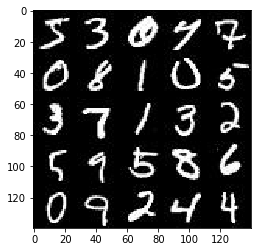

In [172]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

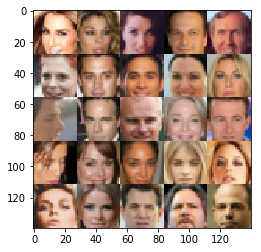

In [173]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [174]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [198]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [209]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):

        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',
                                        kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        lrelu1 = tf.maximum(alpha * x1, x1)
     
        x2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same',
                                        kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)

        x3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same',
                                        kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        x4 = tf.layers.conv2d(lrelu3, 512, 5, strides=2, padding='same',
                                kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        bn4 = tf.layers.batch_normalization(x4, training=True)
        lrelu4 = tf.maximum(alpha * bn4, bn4)
        
        relu4_shape = lrelu4.shape.as_list()
        flat_shape = relu4_shape[1] * relu4_shape[2] * relu4_shape[3]            
        flat = tf.reshape(lrelu4, (-1, flat_shape))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [210]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.05

    with tf.variable_scope('generator', reuse = not is_train):

        x1 = tf.layers.dense(z, 2*2*512)

        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        lrelu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(lrelu1, 256, 5, strides=2, padding='valid'
                                        , kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d_transpose(lrelu2, 128, 5, strides=2, padding='same',
                                        kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        logits = tf.layers.conv2d_transpose(lrelu3, out_channel_dim, 5, strides=2, padding='same',
                                        kernel_initializer= tf.random_normal_initializer(mean = 0, stddev = 0.02))
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [202]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [203]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):        
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [204]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [206]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    input_real, input_z, lr = model_inputs(*data_shape[1:4], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                #from -0.5:0.5 to -1:1
                batch_images*=2
                 
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                for ii in range(3):
                    _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate, input_real: batch_images})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, lr: learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr: learning_rate, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                #show images
                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.2337... Generator Loss: 0.2917
Epoch 1/2... Discriminator Loss: 2.0284... Generator Loss: 0.2650
Epoch 1/2... Discriminator Loss: 1.6333... Generator Loss: 0.3814
Epoch 1/2... Discriminator Loss: 0.8023... Generator Loss: 2.9924
Epoch 1/2... Discriminator Loss: 1.3150... Generator Loss: 0.5177
Epoch 1/2... Discriminator Loss: 1.0707... Generator Loss: 1.8529
Epoch 1/2... Discriminator Loss: 0.8917... Generator Loss: 1.3406
Epoch 1/2... Discriminator Loss: 0.6923... Generator Loss: 1.2800
Epoch 1/2... Discriminator Loss: 1.8366... Generator Loss: 0.5191
Epoch 1/2... Discriminator Loss: 1.1943... Generator Loss: 0.8462


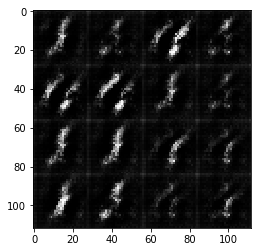

Epoch 1/2... Discriminator Loss: 1.4869... Generator Loss: 0.8331
Epoch 1/2... Discriminator Loss: 1.0535... Generator Loss: 0.9997
Epoch 1/2... Discriminator Loss: 1.4856... Generator Loss: 0.6942
Epoch 1/2... Discriminator Loss: 1.2625... Generator Loss: 0.8200
Epoch 1/2... Discriminator Loss: 1.4589... Generator Loss: 0.5763
Epoch 1/2... Discriminator Loss: 1.2154... Generator Loss: 0.7967
Epoch 1/2... Discriminator Loss: 1.3469... Generator Loss: 0.7204
Epoch 1/2... Discriminator Loss: 1.4165... Generator Loss: 0.6713
Epoch 1/2... Discriminator Loss: 1.3334... Generator Loss: 0.7137
Epoch 1/2... Discriminator Loss: 1.1735... Generator Loss: 0.7727


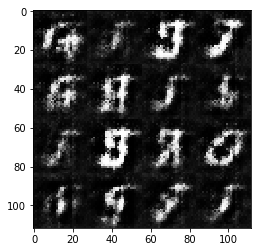

Epoch 1/2... Discriminator Loss: 1.2636... Generator Loss: 0.7410
Epoch 1/2... Discriminator Loss: 1.2993... Generator Loss: 0.7707
Epoch 1/2... Discriminator Loss: 1.4683... Generator Loss: 0.6648
Epoch 1/2... Discriminator Loss: 1.2737... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.1477... Generator Loss: 1.0202
Epoch 1/2... Discriminator Loss: 1.1762... Generator Loss: 0.8933
Epoch 1/2... Discriminator Loss: 1.2481... Generator Loss: 0.6919
Epoch 1/2... Discriminator Loss: 1.2337... Generator Loss: 0.8119
Epoch 1/2... Discriminator Loss: 1.4440... Generator Loss: 0.5740
Epoch 1/2... Discriminator Loss: 1.3234... Generator Loss: 0.5821


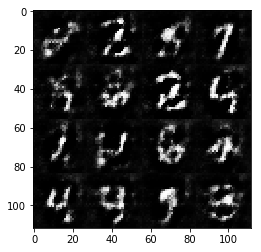

Epoch 1/2... Discriminator Loss: 1.4378... Generator Loss: 0.5609
Epoch 1/2... Discriminator Loss: 1.2831... Generator Loss: 0.7141
Epoch 1/2... Discriminator Loss: 1.2729... Generator Loss: 0.7462
Epoch 1/2... Discriminator Loss: 1.3797... Generator Loss: 0.7821
Epoch 1/2... Discriminator Loss: 1.3188... Generator Loss: 0.9674
Epoch 1/2... Discriminator Loss: 1.3965... Generator Loss: 0.4748
Epoch 1/2... Discriminator Loss: 1.3076... Generator Loss: 0.9123
Epoch 1/2... Discriminator Loss: 1.3184... Generator Loss: 0.5502
Epoch 1/2... Discriminator Loss: 1.5460... Generator Loss: 0.4200
Epoch 1/2... Discriminator Loss: 1.3153... Generator Loss: 0.6423


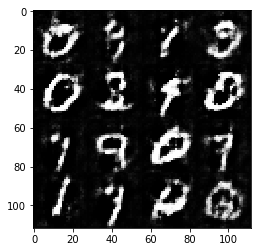

Epoch 1/2... Discriminator Loss: 1.3316... Generator Loss: 0.8647
Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.5641
Epoch 1/2... Discriminator Loss: 1.3129... Generator Loss: 0.9080
Epoch 1/2... Discriminator Loss: 1.3443... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 0.4541
Epoch 1/2... Discriminator Loss: 1.2941... Generator Loss: 0.7502
Epoch 2/2... Discriminator Loss: 1.4382... Generator Loss: 0.8196
Epoch 2/2... Discriminator Loss: 1.2778... Generator Loss: 0.8053
Epoch 2/2... Discriminator Loss: 1.3442... Generator Loss: 0.6766
Epoch 2/2... Discriminator Loss: 1.3353... Generator Loss: 0.6191


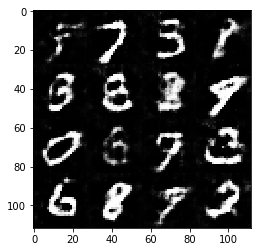

Epoch 2/2... Discriminator Loss: 1.2972... Generator Loss: 0.6807
Epoch 2/2... Discriminator Loss: 1.4595... Generator Loss: 0.5288
Epoch 2/2... Discriminator Loss: 1.4493... Generator Loss: 0.8222
Epoch 2/2... Discriminator Loss: 1.3164... Generator Loss: 0.5878
Epoch 2/2... Discriminator Loss: 1.3623... Generator Loss: 0.6562
Epoch 2/2... Discriminator Loss: 1.3113... Generator Loss: 0.7292
Epoch 2/2... Discriminator Loss: 1.3598... Generator Loss: 0.9284
Epoch 2/2... Discriminator Loss: 1.2993... Generator Loss: 0.7695
Epoch 2/2... Discriminator Loss: 1.3637... Generator Loss: 0.6551
Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 0.6841


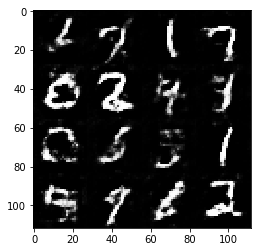

Epoch 2/2... Discriminator Loss: 1.3865... Generator Loss: 0.6699
Epoch 2/2... Discriminator Loss: 1.2911... Generator Loss: 0.6831
Epoch 2/2... Discriminator Loss: 1.4215... Generator Loss: 0.4725
Epoch 2/2... Discriminator Loss: 1.3464... Generator Loss: 0.6949
Epoch 2/2... Discriminator Loss: 1.3127... Generator Loss: 0.7281
Epoch 2/2... Discriminator Loss: 1.5739... Generator Loss: 0.3738
Epoch 2/2... Discriminator Loss: 1.3139... Generator Loss: 0.6842
Epoch 2/2... Discriminator Loss: 1.4244... Generator Loss: 0.6867
Epoch 2/2... Discriminator Loss: 1.2966... Generator Loss: 0.7842
Epoch 2/2... Discriminator Loss: 1.4307... Generator Loss: 0.5746


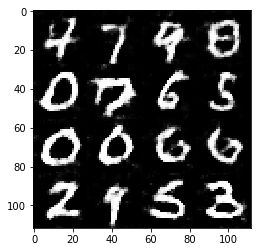

Epoch 2/2... Discriminator Loss: 1.3343... Generator Loss: 0.6529
Epoch 2/2... Discriminator Loss: 1.3763... Generator Loss: 0.5554
Epoch 2/2... Discriminator Loss: 1.3668... Generator Loss: 0.6615
Epoch 2/2... Discriminator Loss: 1.3504... Generator Loss: 0.6836
Epoch 2/2... Discriminator Loss: 1.3167... Generator Loss: 0.5897
Epoch 2/2... Discriminator Loss: 1.4082... Generator Loss: 0.5693
Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 0.6967
Epoch 2/2... Discriminator Loss: 1.4401... Generator Loss: 0.5538
Epoch 2/2... Discriminator Loss: 1.4122... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.4260... Generator Loss: 0.6190


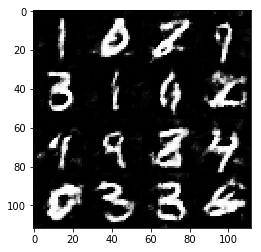

Epoch 2/2... Discriminator Loss: 1.4025... Generator Loss: 0.7037
Epoch 2/2... Discriminator Loss: 1.4187... Generator Loss: 0.7748
Epoch 2/2... Discriminator Loss: 1.3273... Generator Loss: 0.6142
Epoch 2/2... Discriminator Loss: 1.3401... Generator Loss: 0.8302
Epoch 2/2... Discriminator Loss: 1.4671... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 1.4636... Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.5098... Generator Loss: 0.6858
Epoch 2/2... Discriminator Loss: 1.3387... Generator Loss: 0.7964
Epoch 2/2... Discriminator Loss: 1.5554... Generator Loss: 0.7059
Epoch 2/2... Discriminator Loss: 1.4509... Generator Loss: 0.4857


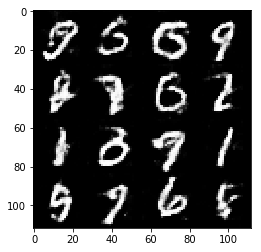

Epoch 2/2... Discriminator Loss: 1.5509... Generator Loss: 0.4860
Epoch 2/2... Discriminator Loss: 1.4382... Generator Loss: 0.4504
Epoch 2/2... Discriminator Loss: 1.3737... Generator Loss: 0.4652


In [207]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.0926... Generator Loss: 0.2118
Epoch 1/1... Discriminator Loss: 2.5065... Generator Loss: 0.1692
Epoch 1/1... Discriminator Loss: 2.0794... Generator Loss: 0.2182
Epoch 1/1... Discriminator Loss: 2.4817... Generator Loss: 0.2681
Epoch 1/1... Discriminator Loss: 1.6682... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.5369... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 1.7925... Generator Loss: 0.7198
Epoch 1/1... Discriminator Loss: 1.5600... Generator Loss: 0.5810
Epoch 1/1... Discriminator Loss: 1.5410... Generator Loss: 0.5914
Epoch 1/1... Discriminator Loss: 1.5523... Generator Loss: 0.6634


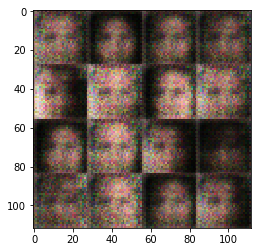

Epoch 1/1... Discriminator Loss: 1.5287... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.4635... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.4432... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.5662... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.5794... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.6734


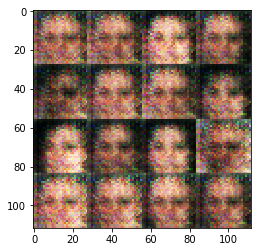

Epoch 1/1... Discriminator Loss: 1.5954... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.7104... Generator Loss: 0.5163
Epoch 1/1... Discriminator Loss: 1.5575... Generator Loss: 0.6578
Epoch 1/1... Discriminator Loss: 1.6329... Generator Loss: 0.5967
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6759


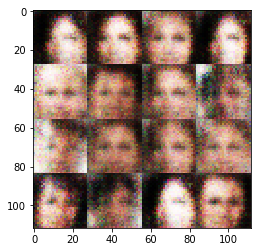

Epoch 1/1... Discriminator Loss: 1.4498... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.6605


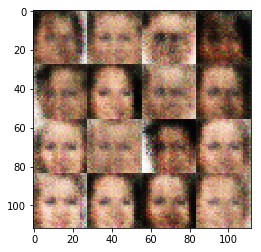

Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.4673... Generator Loss: 0.6313
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.5541... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.4730... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.4960... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.6781


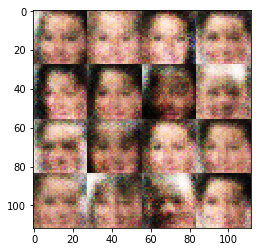

Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.6706
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.6495
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.6566


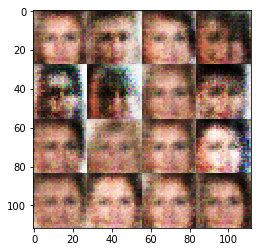

Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.6636


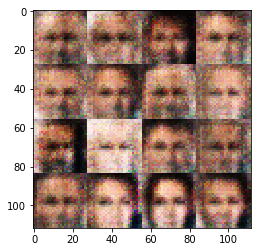

Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.6619


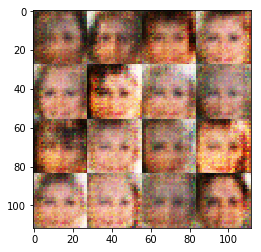

Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6725
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.5078... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.4256... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.6908


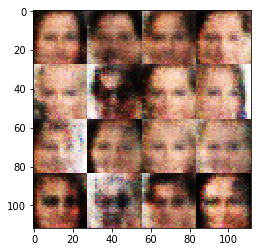

Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.6685
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.6614


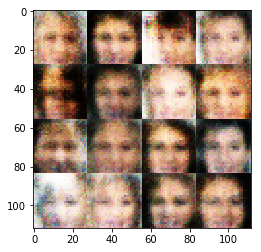

Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6587


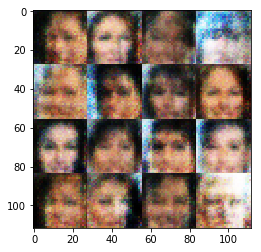

Epoch 1/1... Discriminator Loss: 1.4186... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4087... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.6903


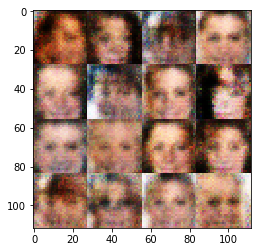

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.6779


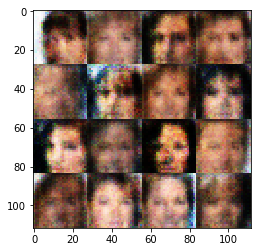

Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 1.4178... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.3976... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.6762


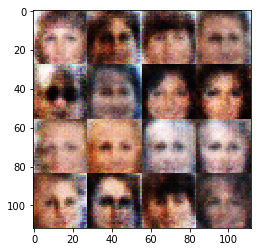

Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.6742


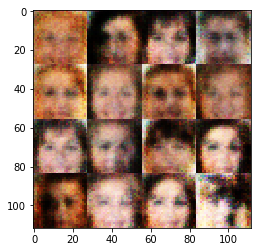

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.7027


In [208]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.